# Data Preparation for GRSTB Signal traffic 

In this notebook we 'll access to our GRSTB data in our default data store for creating a train,validation and test set MTABLE data asset compatible with auto ML image classification.

Steps are the following: 

1) Split the train data set in train and validation data set 
2) Create a json file with for each image: 

see: 

https://learn.microsoft.com/en-us/azure/machine-learning/reference-automl-images-schema?view=azureml-api-2

```json lines
{
   "image_url":"azureml://subscriptions/<my-subscription-id>/resourcegroups/<my-resource-group>/workspaces/<my-workspace>/datastores/<my-datastore>/paths/<path_to_image>",
   "image_details":{
      "format":"image_format",
      "width":"image_width",
      "height":"image_height"
   },
   "label":"class_name",
}
```
3) Create an MTABLE for the train, validation and test data set. 

4) Register the train, validation and test data set  as data asset in azure ML. 

5) Get the data assets and verify train, validation data asset and plot random images for each of them.


Documentation:  https://github.com/MicrosoftDocs/azure-docs/blob/main/articles/machine-learning/how-to-read-write-data-v2.md


## Split the train data set in train and validation
We create our client and our datastore 

In [1]:
from lib import get_client
client=get_client()
print(f'workspace name: {client.workspace_name}')
datastore=client.datastores.get_default()
print(f'datastore name: {datastore.name} type: {datastore.type}')

workspace name: azure-ml
datastore name: storecapture type: DatastoreType.AZURE_DATA_LAKE_GEN2


we build the path to train.csv and test.csv in the datastore 

In [2]:
from lib import build_azure_data_path
train_path="lab-data/gtsrb-german-traffic-sign/Train.csv"
test_path="lab-data/gtsrb-german-traffic-sign/Test.csv"
azureml_train_path=build_azure_data_path(client, datastore, train_path)
azureml_test_path=build_azure_data_path(client, datastore, test_path)
print(f'azureml_train_path: {azureml_train_path}')
print(f'azureml_test_path: {azureml_test_path}')

azureml_train_path: azureml://subscriptions/7db1ee9f-abea-4b8b-b5a9-e6e82ecfa19d/resourcegroups/azure-ml/workspaces/azure-ml/datastores/storecapture/paths/lab-data/gtsrb-german-traffic-sign/Train.csv
azureml_test_path: azureml://subscriptions/7db1ee9f-abea-4b8b-b5a9-e6e82ecfa19d/resourcegroups/azure-ml/workspaces/azure-ml/datastores/storecapture/paths/lab-data/gtsrb-german-traffic-sign/Test.csv


In [3]:
import pandas as pd
train_df=pd.read_csv(azureml_train_path)
train_df 

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [4]:
test_df=pd.read_csv(azureml_test_path)
test_df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


Now we will split our train set in train and validation set with well balanced (same class distribution in each)


In [5]:
from sklearn.model_selection import train_test_split
def validation_split(df: pd.DataFrame, col_target: str, val_size: float = 0.2):
    df_train, df_val = train_test_split(df, stratify=df[col_target], test_size=val_size, random_state=43)
    return df_train, df_val
df_train,df_validation=validation_split(train_df, col_target='ClassId')
df_validation

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
25727,110,100,10,8,101,92,18,Train/18/00018_00005_00017.png
1502,29,31,6,6,24,25,1,Train/1/00001_00031_00002.png
26837,67,58,6,6,61,52,19,Train/19/00019_00002_00017.png
28082,42,39,5,5,36,34,23,Train/23/00023_00013_00002.png
29776,51,50,5,6,46,45,25,Train/25/00025_00043_00016.png
...,...,...,...,...,...,...,...,...
34446,46,47,5,6,41,41,35,Train/35/00035_00008_00007.png
3692,35,32,6,6,29,26,2,Train/2/00002_00030_00002.png
27368,38,37,5,5,33,32,22,Train/22/00022_00002_00008.png
9291,48,43,6,5,43,38,5,Train/5/00005_00028_00021.png


## Create the JSON AUTOML for Classification

Now create the json line file for train,validation and test data set 

In [6]:
import ndjson
def build_image_detail(row):
    return {
        "format":"png",
        "width": row['Width'],
        "height": row['Height'],
    }

def create_image_json_df(df: pd.DataFrame,datastore_root_dir:str)->pd.DataFrame:
    df["image_url"]=df["Path"].apply(lambda p: datastore_root_dir+p)
    df["label"]=df["ClassId"].astype(pd.StringDtype())
    df["image_details"]=df.apply(build_image_detail,axis=1)
    return df[[ "image_url","image_details", "label"]]

def save_jsonl_df(df_json: pd.DataFrame,path:str):
    json_data=df_json.to_dict('records')
    with open(path, 'w') as f:
        ndjson.dump(json_data, f,ensure_ascii=False)    

def build_automl_json_file(df: pd.DataFrame,datastore_root_dir:str, local_path:str):
    json_df=create_image_json_df(df,datastore_root_dir)
    save_jsonl_df(json_df, local_path)

azureml_root_dir=build_azure_data_path(client,datastore,'lab-data/gtsrb-german-traffic-sign/')
build_automl_json_file(df_train, azureml_root_dir, "data/train/train.jsonl")
build_automl_json_file(df_validation, azureml_root_dir, "data/validation/validation.jsonl")
build_automl_json_file(test_df, azureml_root_dir, "data/test/test.jsonl")



## Create MLTABLE

Now create a MLTABLE for each of this dataset 

In [7]:
import mltable
from mltable import MLTableHeaders, MLTableFileEncoding, DataType

def build_automl_table(table_folder:str,json_line_path:str):
    paths = [{'file': json_line_path}]
    tbl=mltable.from_json_lines_files(paths)
    data_types = {
    "image_url": DataType.to_stream()
    }
    tbl=tbl.convert_column_types(data_types)
    mltable_folder = table_folder
    tbl.save(mltable_folder)

build_automl_table("data/train","data/train/train.jsonl")    
build_automl_table("data/validation","data/validation/validation.jsonl")
build_automl_table("data/test","data/test/test.jsonl")

## Register as Data Asset 

Now you can register these 3 MTABLE as data asset in our Azure machine learning client, the json file will automatically uploaded on azure machine learning  

In [8]:
from lib import get_or_create_table_data_asset
ds_train=get_or_create_table_data_asset(client=client,mltable_folder="data/train",
                                  name="automl-grstb-classification-train",version="2.0.0",description="Training data set for GRSTB classification task")
ds_validation=get_or_create_table_data_asset(client=client,mltable_folder="data/validation",
                                  name="automl-grstb-classification-validation",version="2.0.0",description="Validation data set for GRSTB classification")
ds_test=get_or_create_table_data_asset(client=client,mltable_folder="data/test",
                                  name="automl-grstb-classification-test",version="2.0.0",description="Test data set for GRSTB classification")

datastore name: automl-grstb-classification-train version: 2.0.0 get it
datastore name: automl-grstb-classification-validation version: 2.0.0 get it
datastore name: automl-grstb-classification-test version: 2.0.0 get it


## Test data asset 

Now we can test our data asset to verify that everything is fine

In [9]:
 
from lib import AzureImageReader
from lib import plot_random_images
from azureml.fsspec import AzureMachineLearningFileSystem
# Create an image reader that can read the image on our datastore 
# and return a numpy image. 
datastore_path=build_azure_data_path(client,datastore)
fs=AzureMachineLearningFileSystem(uri=datastore_path)
image_reader=AzureImageReader(fs,output_format='numpy')

In [10]:
tbl_train = mltable.load(f"azureml:/{ds_train.id}").to_pandas_dataframe()
tbl_train

,image_url,image_details,label
0,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 58, 'height': 46}",21
1,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 38, 'height': 38}",7
2,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 29, 'height': 29}",9
3,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 34, 'height': 35}",17
4,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 27, 'height': 29}",12
...,...,...,...
31362,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 96, 'height': 85}",13
31363,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 83, 'height': 85}",0
31364,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 48, 'height': 46}",13
31365,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 92, 'height': 93}",1


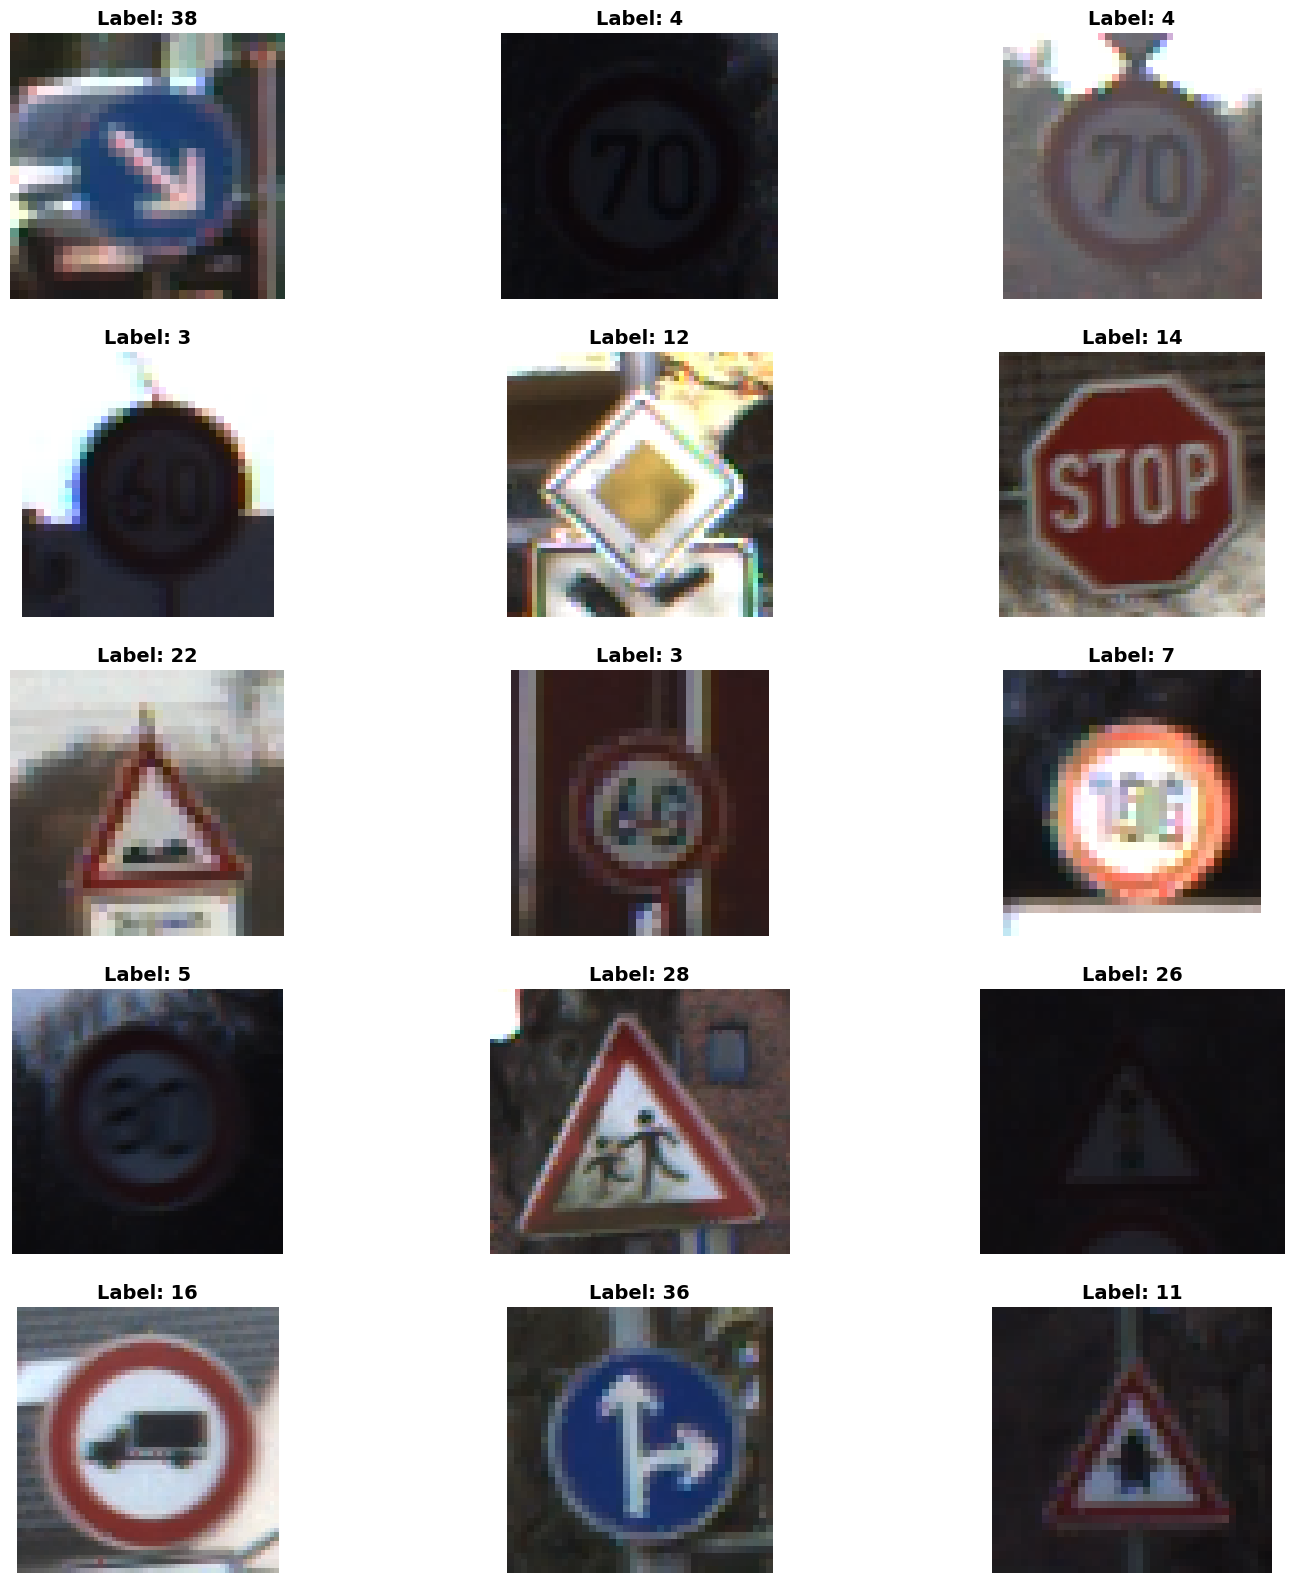

In [11]:
plot_random_images(tbl_train,image_reader=image_reader)


In [12]:
tbl_validation = mltable.load(f"azureml:/{ds_validation.id}").to_pandas_dataframe()
tbl_validation

,image_url,image_details,label
0,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 110, 'height': 100}",18
1,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 29, 'height': 31}",1
2,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 67, 'height': 58}",19
3,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 42, 'height': 39}",23
4,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 51, 'height': 50}",25
...,...,...,...
7837,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 46, 'height': 47}",35
7838,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 35, 'height': 32}",2
7839,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 38, 'height': 37}",22
7840,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 48, 'height': 43}",5


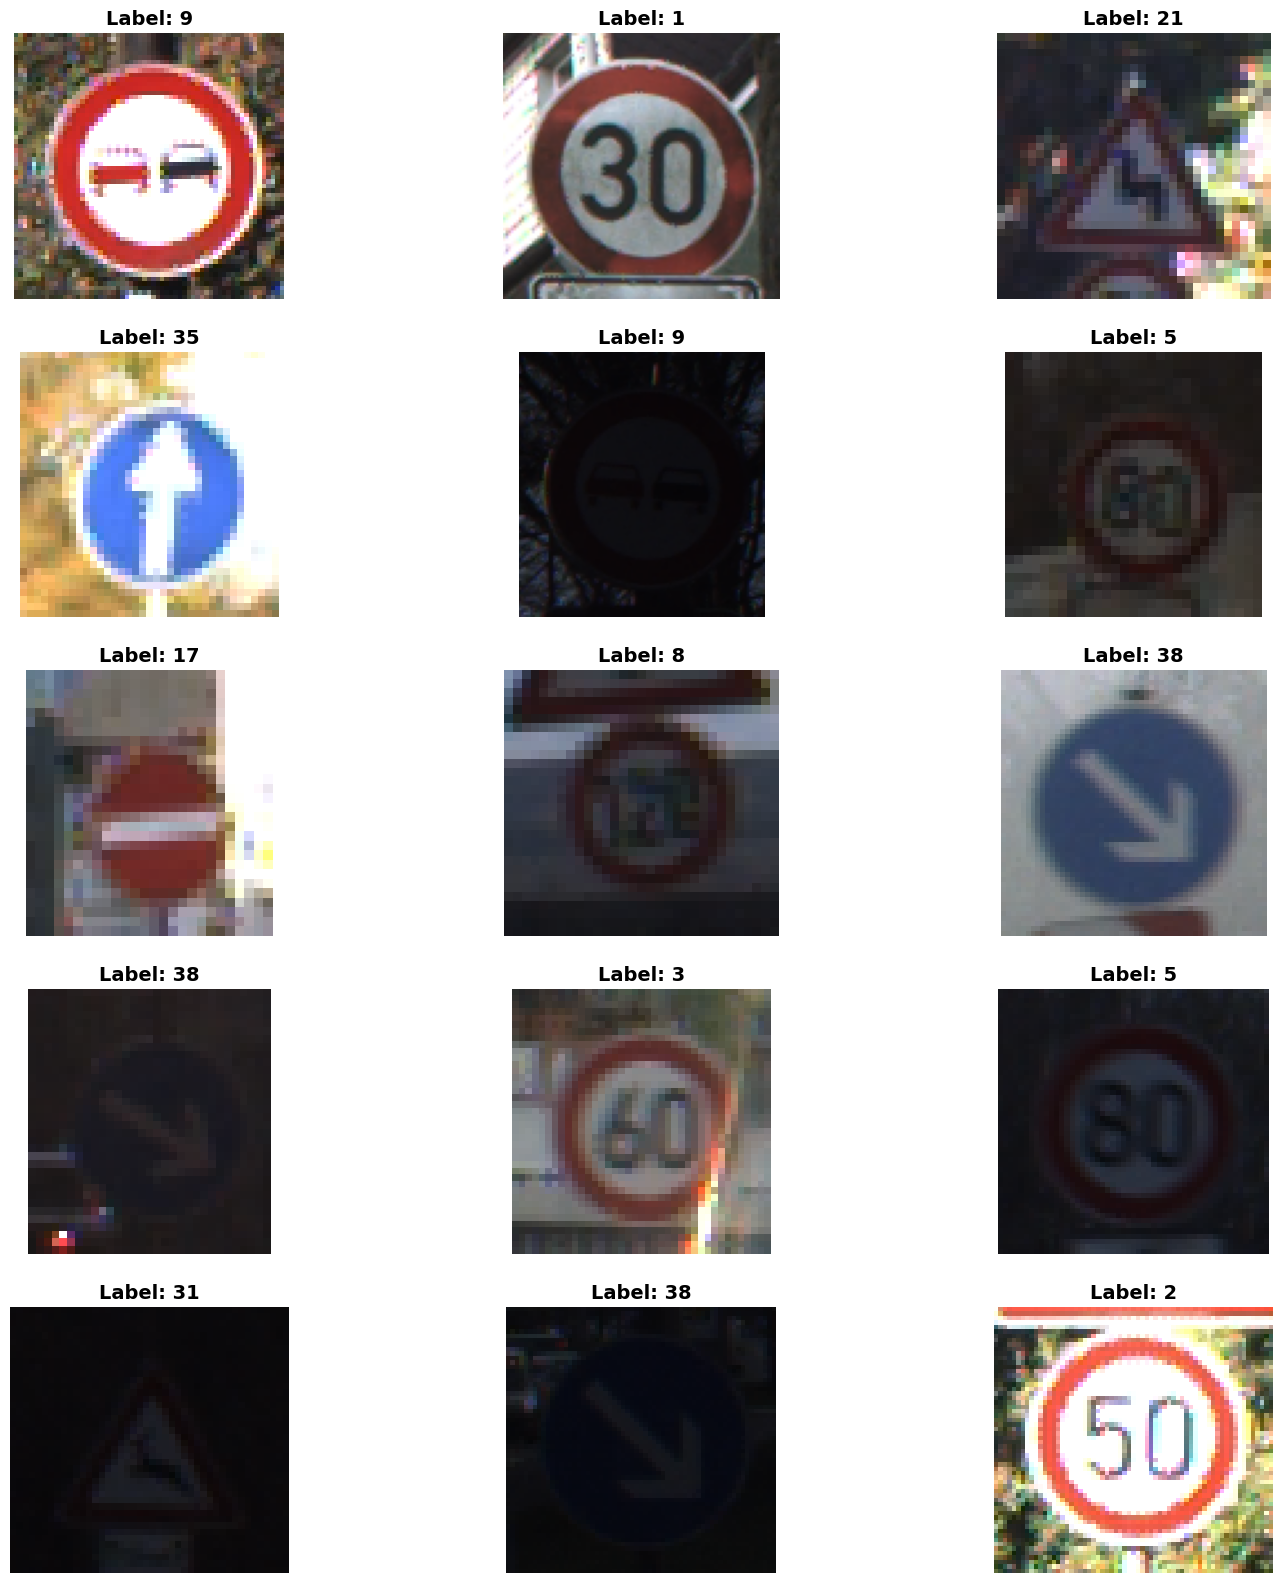

In [13]:
plot_random_images(tbl_validation,image_reader=image_reader)

In [14]:
tbl_test = mltable.load(f"azureml:/{ds_test.id}").to_pandas_dataframe()
tbl_test

,image_url,image_details,label
0,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 53, 'height': 54}",16
1,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 42, 'height': 45}",1
2,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 48, 'height': 52}",38
3,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 27, 'height': 29}",33
4,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 60, 'height': 57}",11
...,...,...,...
12625,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 42, 'height': 41}",12
12626,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 50, 'height': 51}",33
12627,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 29, 'height': 29}",6
12628,storecapture/lab-data/gtsrb-german-traffic-sig...,"{'format': 'png', 'width': 48, 'height': 49}",7


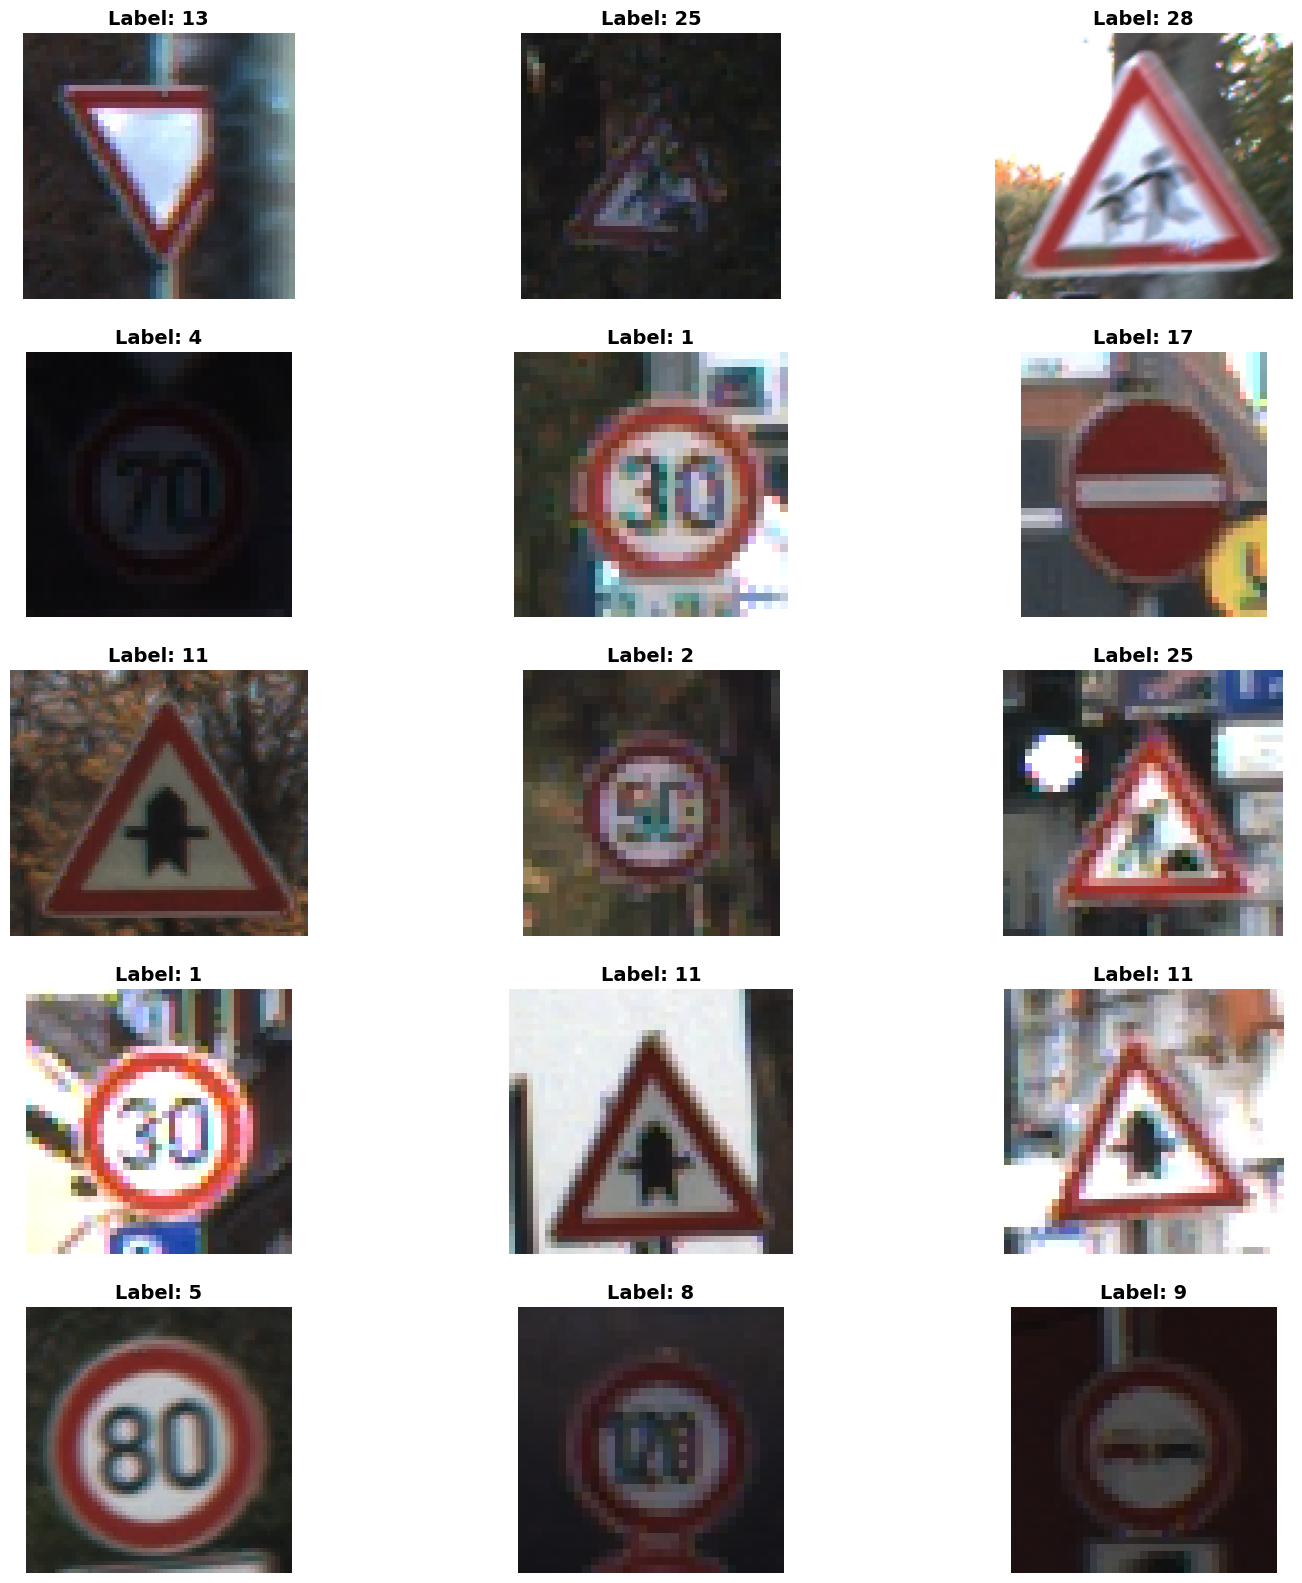

In [15]:
plot_random_images(tbl_test,image_reader=image_reader)

Now we are ready to use this data asset in an automated ML image classification task or in a custom training job